In [80]:
import ROOT
import pandas as pd
import numpy as np
import sklearn as sk

In [81]:
df_nr=pd.read_csv("/home/agrobov/AGR/DEAP3600/csv/nr_wimp100GeV_ntp.csv", sep =",", header=0)
df_a1=pd.read_csv("/home/agrobov/AGR/DEAP3600/csv/fginis_102yrs_ntp.csv", sep =",", header=0)
df_a2=pd.read_csv("/home/agrobov/AGR/DEAP3600/csv/fginos_102yrs_ntp.csv", sep =",", header=0)
df_a3=pd.read_csv("/home/agrobov/AGR/DEAP3600/csv/fgoutis_102yrs_ntp.csv", sep =",", header=0)

In [82]:
df_nr["label"] = [1 for x in range(len(df_nr.index))]
df_a1["label"] = [0 for x in range(len(df_a1.index))]
df_a2["label"] = [0 for x in range(len(df_a2.index))]
df_a3["label"] = [0 for x in range(len(df_a3.index))]

In [83]:
alphas_frame = [df_a1,df_a2,df_a3]
alphas_data=pd.concat(alphas_frame, sort=False)

In [84]:
from sklearn.utils import shuffle
alphas_data=shuffle(alphas_data)
df_nr = shuffle(df_nr)
df_nr=df_nr.iloc[0:5828,:]

In [85]:
frames=[df_nr,alphas_data]
data=pd.concat(frames, sort=False)

In [86]:
data.head()

,runID,subrunID,eventID,dtmTrigSrc,dtmTrigOut,dtmNarrowQ,dtmWideQ,ebBox,calcut,calcutstatus,...,mc_edep_e_lar,mc_edep_e_gar,mc_edep_tot_tpb,mc_edep_tot_lar,mc_edep_tot_gar,mc_initial_scint_time,mc_nhit,mc_neckVetoNPhotons,mc_neckVetoN,label
74940,2,0,642,2048,32768,5815,7628,2,768,412316925951,...,0,0.0,0,0.106544,0.0,0,127,3,0,1
29416,2,0,467,8192,524288,6096,7652,2,896,412316925951,...,0,0.0,0,0.095388,0.0,0,-123,2,0,1
64022,2,0,81,2048,32768,4087,5384,1,768,412316925951,...,0,0.0,0,0.049754,0.0,0,97,1,0,1
55379,2,0,286,2048,32768,3669,5774,1,768,412316925951,...,0,0.0,0,0.055652,0.0,0,89,0,0,1
25674,2,0,218,2048,32768,4844,6424,1,768,412316925951,...,0,0.0,0,0.073053,0.0,0,101,1,0,1


In [87]:
data=data[["nhit","qPE","qTotal","nPE","nSC","nSCBayes","fprompt","rprompt60Bayes","fmaxpe","fmaxnsc","pulseindexfirstgar","chargetopring","chargesecondring","chargeequatorring","chargebottomring",
"chargesecondbottomring","chargethirdbottomring","mblikelihoodX","mblikelihoodY","mblikelihoodZ","timefit2X","timefit2Y","timefit2Z","dbscanN","dbscanS","lratioB","lratioB2","lratioC",
"mblikelihoodKS","mblikelihoodKuiper","pmtidfirstpulse","pmtidfirstpulseT","pmtidfirstpulseTLAr","pmtidfirstpulseTGAr","pulseindexfirstgarLT65","pulseindexfirstgarLT55",
"pulseindexfirstgarLT45","pulseindexfirstgarLT40","pulseindexfirstgarLT30","pulseindexfirstgarLT25","pulseindexfirstgarLT20","pulseindexfirstgarLT10","pulseindexfirstgarLT5","timefit2NLL",
"sht0","sht1","sht2","sht3","sht4","sht5","sht6","sht7","sht8","sht9","sht10","sht11","sht12","sht13","sht14","shr","nmaxpe1","nmaxpe2","nmaxpe3","nmaxpe4","label"]]
data.head()

,nhit,qPE,qTotal,nPE,nSC,nSCBayes,fprompt,rprompt60Bayes,fmaxpe,fmaxnsc,...,sht11,sht12,sht13,sht14,shr,nmaxpe1,nmaxpe2,nmaxpe3,nmaxpe4,label
74940,115,171.12119,1630.8446,164,158,169.82674,0.726209,0.751290,0.035560,0.031646,...,63,76,59,76,0.199862,16,20,25,30,1
29416,126,181.47234,1729.5594,184,176,182.68228,0.729155,0.733463,0.029154,0.028409,...,86,77,62,62,0.196476,13,18,23,27,1
64022,89,126.90912,1211.2809,115,105,114.54869,0.699731,0.752461,0.042963,0.028571,...,74,70,49,70,0.186612,14,19,24,29,1
55379,81,129.20383,1231.2275,120,107,113.19574,0.604789,0.666155,0.091621,0.028037,...,59,59,68,84,0.181381,14,21,28,33,1
25674,93,153.76643,1470.1656,150,129,140.71670,0.686331,0.728982,0.103159,0.031008,...,76,53,76,77,0.154019,15,23,29,35,1


Cuts are preapplied: mblikelihoodR<630 && mblikelihoodZ<550, (rprompt60Bayes > -0.001917*nSCBayes + 0.877115 && rprompt60Bayes > 0.585), fprompt<0.8, subeventN==1 && fmaxpe<0.4 && eventTime>2300 && eventTime<2650 && numEarlyPulses<=3 && deltat>20e3

User_feature1 = timefit2Z - mblikelihoodZ
//
User_feature2 = sqrt((timefit2X - mblikelihoodX)^2+(timefit2Y - mblikelihoodY)^2+(timefit2Z - mblikelihoodZ)^2)

In [88]:
data['user_feature1'] = data.loc[:,'timefit2Z'] - data.loc[:,'mblikelihoodZ']
data['user_feature2'] = np.sqrt((data.loc[:,'timefit2X'] - data.loc[:,'mblikelihoodX'])**2+(data.loc[:,'timefit2Y'] - data.loc[:,'mblikelihoodY'])**2+(data.loc[:,'timefit2Z'] - data.loc[:,'mblikelihoodZ'])**2)
data['uf_3'] = data.loc[:,'rprompt60Bayes'] / data.loc[:,'user_feature1']
data.head()

,nhit,qPE,qTotal,nPE,nSC,nSCBayes,fprompt,rprompt60Bayes,fmaxpe,fmaxnsc,...,sht14,shr,nmaxpe1,nmaxpe2,nmaxpe3,nmaxpe4,label,user_feature1,user_feature2,uf_3
74940,115,171.12119,1630.8446,164,158,169.82674,0.726209,0.751290,0.035560,0.031646,...,76,0.199862,16,20,25,30,1,196.075320,200.880143,0.003832
29416,126,181.47234,1729.5594,184,176,182.68228,0.729155,0.733463,0.029154,0.028409,...,62,0.196476,13,18,23,27,1,75.715260,183.688636,0.009687
64022,89,126.90912,1211.2809,115,105,114.54869,0.699731,0.752461,0.042963,0.028571,...,70,0.186612,14,19,24,29,1,-26.658756,277.241997,-0.028226
55379,81,129.20383,1231.2275,120,107,113.19574,0.604789,0.666155,0.091621,0.028037,...,84,0.181381,14,21,28,33,1,107.450140,216.699036,0.006200
25674,93,153.76643,1470.1656,150,129,140.71670,0.686331,0.728982,0.103159,0.031008,...,77,0.154019,15,23,29,35,1,195.622030,387.411403,0.003726


In [89]:
data=data.fillna(0)
data.head()

,nhit,qPE,qTotal,nPE,nSC,nSCBayes,fprompt,rprompt60Bayes,fmaxpe,fmaxnsc,...,sht14,shr,nmaxpe1,nmaxpe2,nmaxpe3,nmaxpe4,label,user_feature1,user_feature2,uf_3
74940,115,171.12119,1630.8446,164,158,169.82674,0.726209,0.751290,0.035560,0.031646,...,76,0.199862,16,20,25,30,1,196.075320,200.880143,0.003832
29416,126,181.47234,1729.5594,184,176,182.68228,0.729155,0.733463,0.029154,0.028409,...,62,0.196476,13,18,23,27,1,75.715260,183.688636,0.009687
64022,89,126.90912,1211.2809,115,105,114.54869,0.699731,0.752461,0.042963,0.028571,...,70,0.186612,14,19,24,29,1,-26.658756,277.241997,-0.028226
55379,81,129.20383,1231.2275,120,107,113.19574,0.604789,0.666155,0.091621,0.028037,...,84,0.181381,14,21,28,33,1,107.450140,216.699036,0.006200
25674,93,153.76643,1470.1656,150,129,140.71670,0.686331,0.728982,0.103159,0.031008,...,77,0.154019,15,23,29,35,1,195.622030,387.411403,0.003726


In [90]:
cols1 = [data.columns[-1]] + [col for col in data if col != data.columns[-1]]
data = data[cols1]
cols2 = [data.columns[-1]] + [col for col in data if col != data.columns[-1]]
data = data[cols2]

In [91]:
data

,user_feature2,uf_3,nhit,qPE,qTotal,nPE,nSC,nSCBayes,fprompt,rprompt60Bayes,...,sht12,sht13,sht14,shr,nmaxpe1,nmaxpe2,nmaxpe3,nmaxpe4,label,user_feature1
74940,200.880143,0.003832,115,171.121190,1630.84460,164,158,169.826740,0.726209,0.751290,...,76,59,76,0.199862,16,20,25,30,1,196.075320
29416,183.688636,0.009687,126,181.472340,1729.55940,184,176,182.682280,0.729155,0.733463,...,77,62,62,0.196476,13,18,23,27,1,75.715260
64022,277.241997,-0.028226,89,126.909120,1211.28090,115,105,114.548690,0.699731,0.752461,...,70,49,70,0.186612,14,19,24,29,1,-26.658756
55379,216.699036,0.006200,81,129.203830,1231.22750,120,107,113.195740,0.604789,0.666155,...,59,68,84,0.181381,14,21,28,33,1,107.450140
25674,387.411403,0.003726,93,153.766430,1470.16560,150,129,140.716700,0.686331,0.728982,...,53,76,77,0.154019,15,23,29,35,1,195.622030
36820,299.641890,0.003767,76,99.032030,942.48420,91,89,96.435340,0.707504,0.713818,...,64,65,68,0.163670,20,28,37,42,1,189.501060
68842,160.718848,-0.017900,103,164.735440,1563.31810,160,143,153.867480,0.668062,0.722993,...,65,90,53,0.156298,14,19,24,30,1,-40.391140
42982,151.236800,0.017406,118,176.499190,1682.58440,164,153,163.774580,0.668303,0.668583,...,70,79,69,0.198465,16,23,28,33,1,38.410030
27954,107.462266,0.010130,78,98.098710,933.04785,96,94,100.089640,0.748737,0.739877,...,63,69,64,0.163925,16,24,29,35,1,73.041350
38916,241.072766,0.003312,100,167.083940,1589.54080,157,147,157.159350,0.696403,0.716533,...,56,62,63,0.183863,13,20,26,31,1,216.354869


In [92]:
data.columns

Index(['user_feature2', 'uf_3', 'nhit', 'qPE', 'qTotal', 'nPE', 'nSC',
       'nSCBayes', 'fprompt', 'rprompt60Bayes', 'fmaxpe', 'fmaxnsc',
       'pulseindexfirstgar', 'chargetopring', 'chargesecondring',
       'chargeequatorring', 'chargebottomring', 'chargesecondbottomring',
       'chargethirdbottomring', 'mblikelihoodX', 'mblikelihoodY',
       'mblikelihoodZ', 'timefit2X', 'timefit2Y', 'timefit2Z', 'dbscanN',
       'dbscanS', 'lratioB', 'lratioB2', 'lratioC', 'mblikelihoodKS',
       'mblikelihoodKuiper', 'pmtidfirstpulse', 'pmtidfirstpulseT',
       'pmtidfirstpulseTLAr', 'pmtidfirstpulseTGAr', 'pulseindexfirstgarLT65',
       'pulseindexfirstgarLT55', 'pulseindexfirstgarLT45',
       'pulseindexfirstgarLT40', 'pulseindexfirstgarLT30',
       'pulseindexfirstgarLT25', 'pulseindexfirstgarLT20',
       'pulseindexfirstgarLT10', 'pulseindexfirstgarLT5', 'timefit2NLL',
       'sht0', 'sht1', 'sht2', 'sht3', 'sht4', 'sht5', 'sht6', 'sht7', 'sht8',
       'sht9', 'sht10', 'sht11', '

In [93]:
import seaborn as sns
from matplotlib import pylab as plt

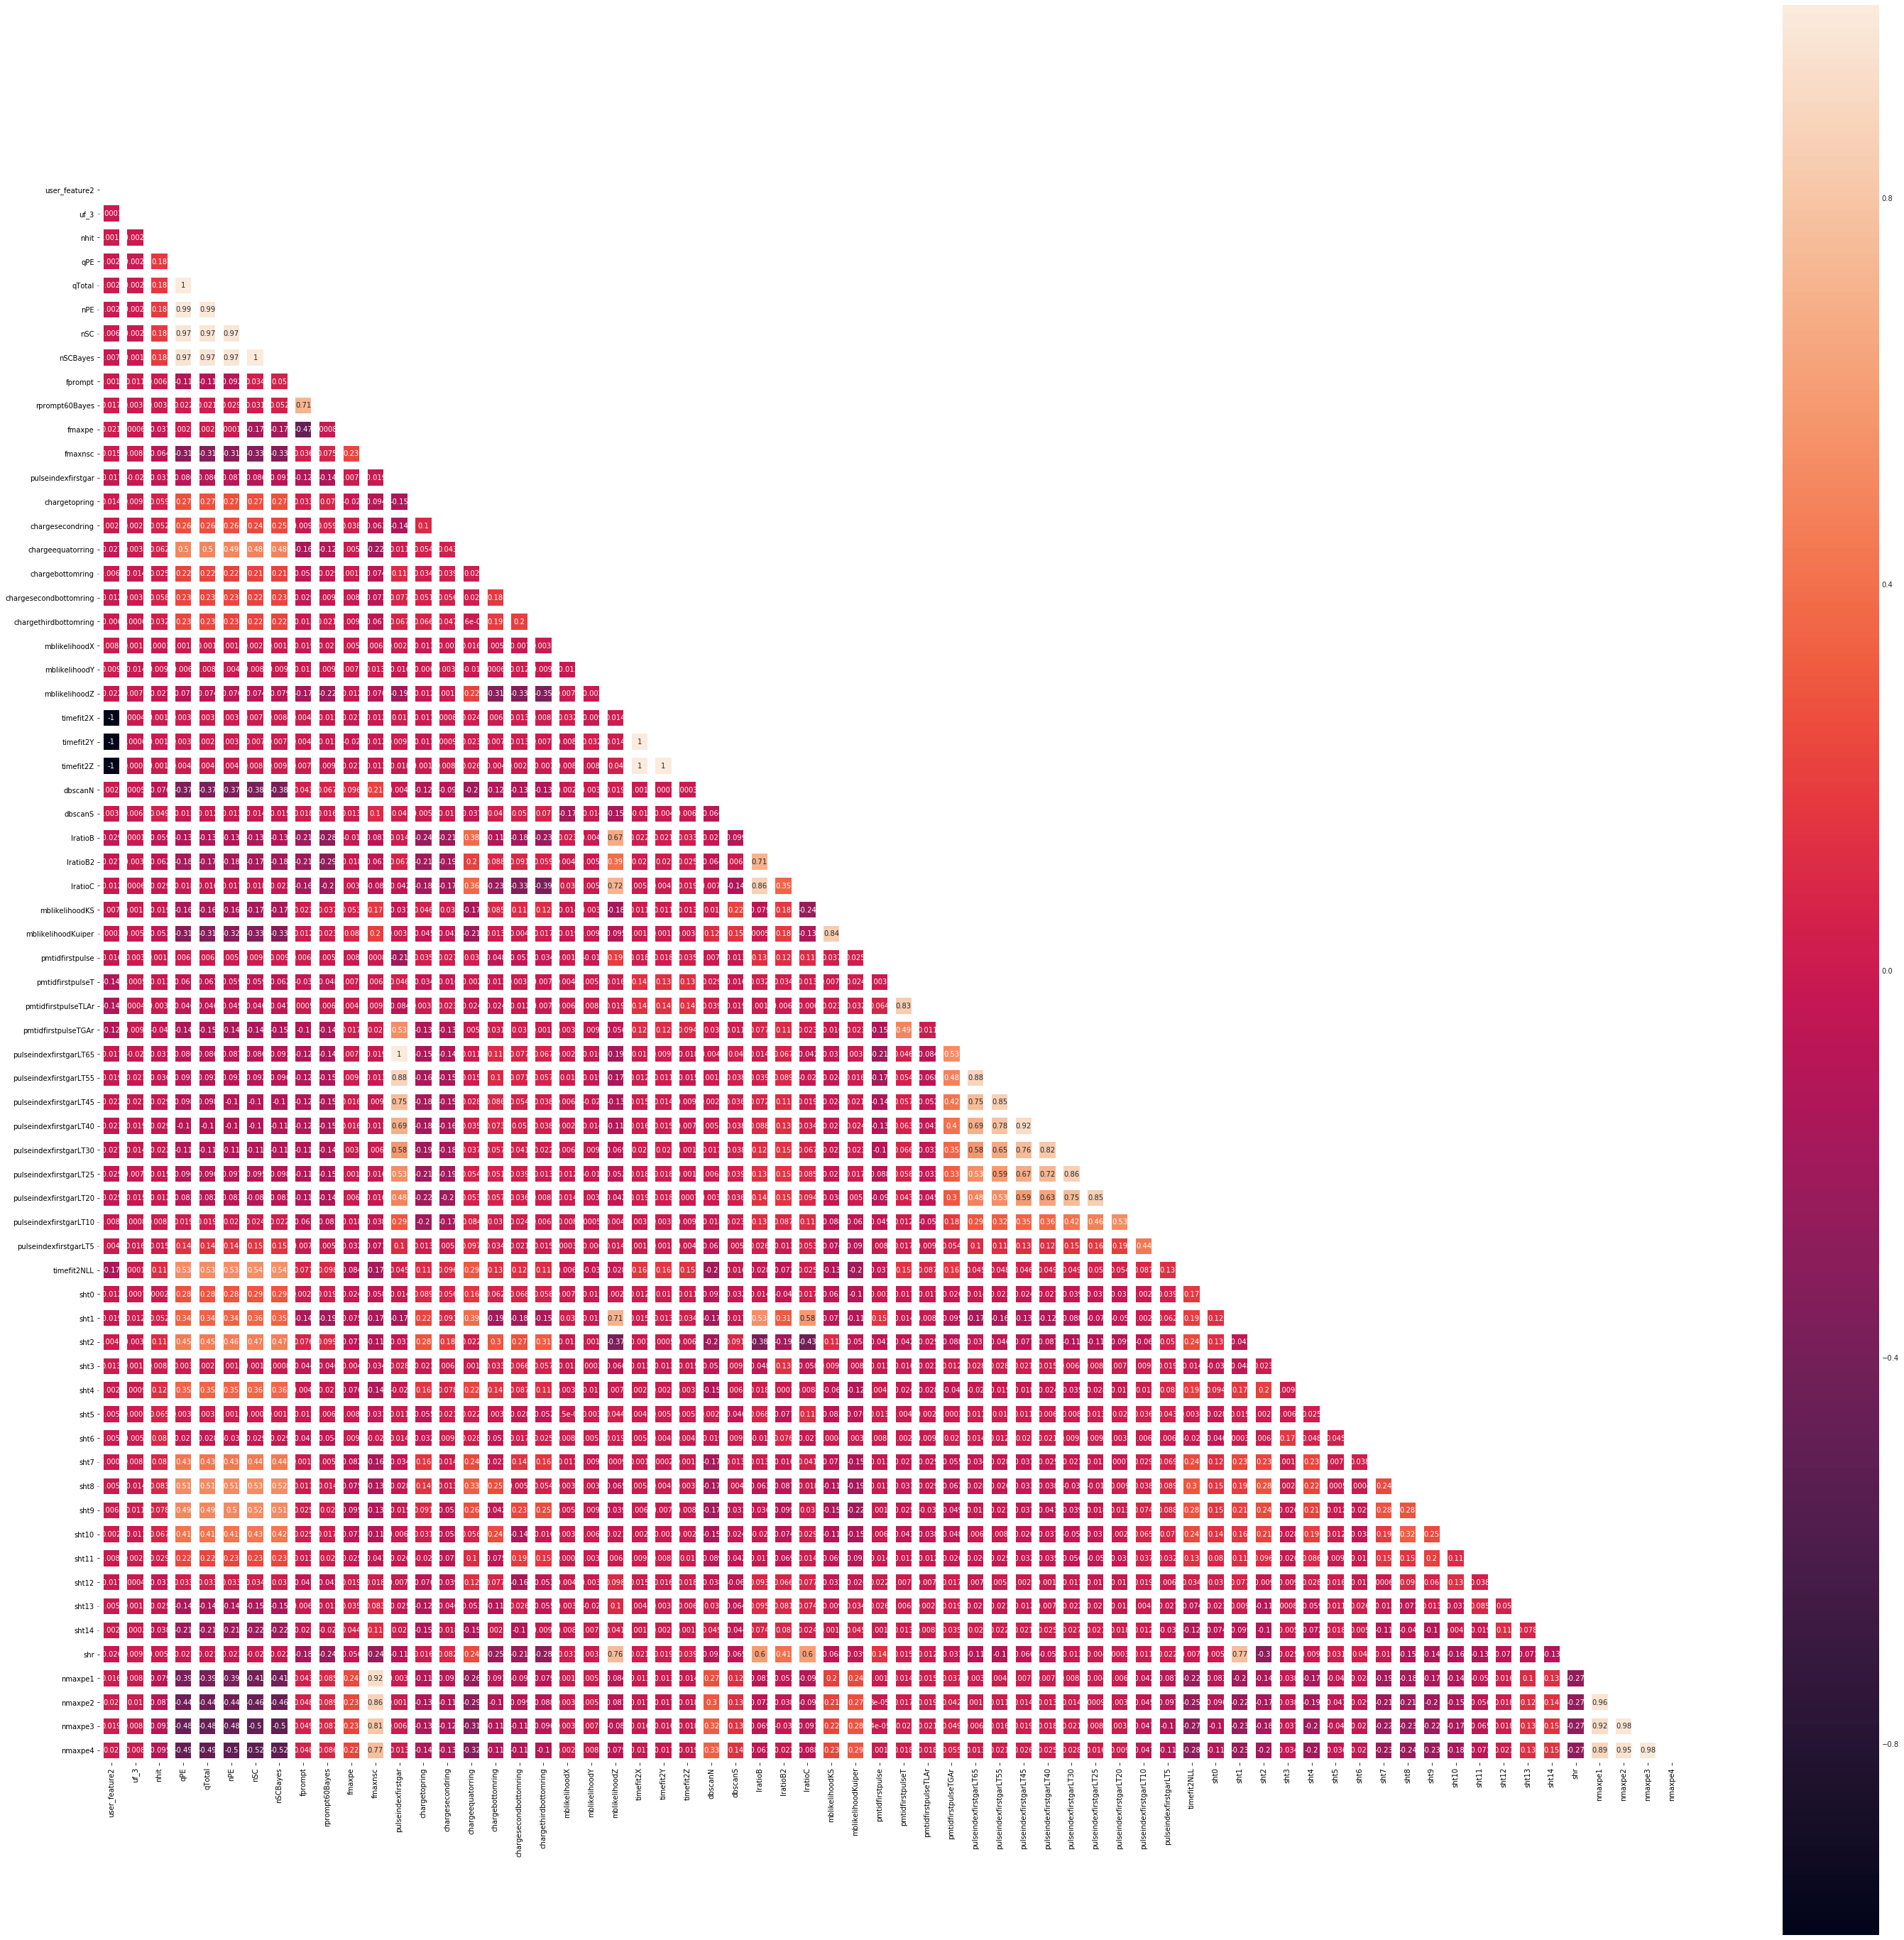

In [94]:
corr = data.iloc[:,0:66].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,50))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=True, annot=True, linewidths=10.5)

### Start learning

In [95]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics 
from sklearn.externals import joblib as jb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [96]:
data_X = data.iloc[:,0:66]
data_Y = data['label']
print(data_X.head())

       user_feature2      uf_3  nhit        qPE     qTotal  nPE  nSC  \
74940     200.880143  0.003832   115  171.12119  1630.8446  164  158   
29416     183.688636  0.009687   126  181.47234  1729.5594  184  176   
64022     277.241997 -0.028226    89  126.90912  1211.2809  115  105   
55379     216.699036  0.006200    81  129.20383  1231.2275  120  107   
25674     387.411403  0.003726    93  153.76643  1470.1656  150  129   

        nSCBayes   fprompt  rprompt60Bayes   ...     sht10  sht11  sht12  \
74940  169.82674  0.726209        0.751290   ...        85     63     76   
29416  182.68228  0.729155        0.733463   ...        67     86     77   
64022  114.54869  0.699731        0.752461   ...        63     74     70   
55379  113.19574  0.604789        0.666155   ...        83     59     59   
25674  140.71670  0.686331        0.728982   ...        71     76     53   

       sht13  sht14       shr  nmaxpe1  nmaxpe2  nmaxpe3  nmaxpe4  
74940     59     76  0.199862       16    

In [97]:
cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

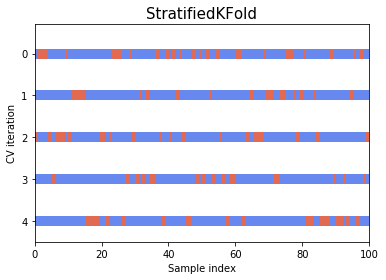

In [98]:
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)


    # Formatting
    yticklabels = list(range(n_splits))
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_cv_indices(cv, data_X, data_Y, ax, 5)

In [99]:
clf = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 15, n_estimators = 40, min_child_weight= 3)

In [100]:
scoring = ['accuracy', 'average_precision', 'f1', 'recall', 'roc_auc','completeness_score', 'explained_variance']

In [101]:
scores = cross_validate(clf, data_X, data_Y, scoring=scoring, cv=cv)

/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

In [102]:
scores

/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_average_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/agrobov/anaconda3/lib/python3.6

{'fit_time': array([4.91472983, 5.48521447, 5.80065727, 4.99150014, 4.8046751 ]),
 'score_time': array([0.09478784, 0.12292075, 0.12215114, 0.08551145, 0.0961113 ]),
 'test_accuracy': array([0.91852487, 0.92367067, 0.92795883, 0.93133047, 0.91373391]),
 'train_accuracy': array([0.9954955 , 0.995281  , 0.99571   , 0.99571092, 0.99624705]),
 'test_average_precision': array([0.97860985, 0.98012293, 0.97881795, 0.98130681, 0.97394065]),
 'train_average_precision': array([0.99982861, 0.99983151, 0.99988499, 0.99987748, 0.99972068]),
 'test_f1': array([0.91852487, 0.92464014, 0.92851064, 0.93138937, 0.91279826]),
 'train_f1': array([0.99550032, 0.99528504, 0.99571092, 0.99571551, 0.99624906]),
 'test_recall': array([0.91852487, 0.93653516, 0.93567753, 0.93218884, 0.90300429]),
 'train_recall': array([0.996568  , 0.996139  , 0.9959245 , 0.99678319, 0.99678319]),
 'test_roc_auc': array([0.97826276, 0.97980297, 0.97931825, 0.98188289, 0.97416641]),
 'train_roc_auc': array([0.99982958, 0.9998329

In [103]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))

Accuracy: 0.923 (+/- 0.013)


In [104]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(clf, data_X, data_Y, cv=cv)

/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agrobov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

In [105]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(data_Y, predictions))
print(classification_report(data_Y,predictions))
print("Accuracy score: " + str(metrics.accuracy_score(data_Y, predictions)))    

[[5377  451]
 [ 438 5390]]
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      5828
          1       0.92      0.92      0.92      5828

avg / total       0.92      0.92      0.92     11656

Accuracy score: 0.9237302676733014


Confusion matrix, without normalization
[[5377  451]
 [ 438 5390]]


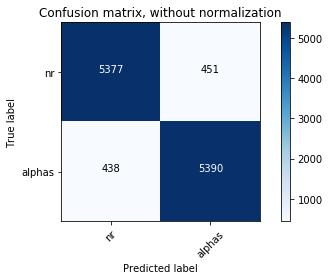

In [106]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(data_Y, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["nr","alphas"],
                      title='Confusion matrix, without normalization')

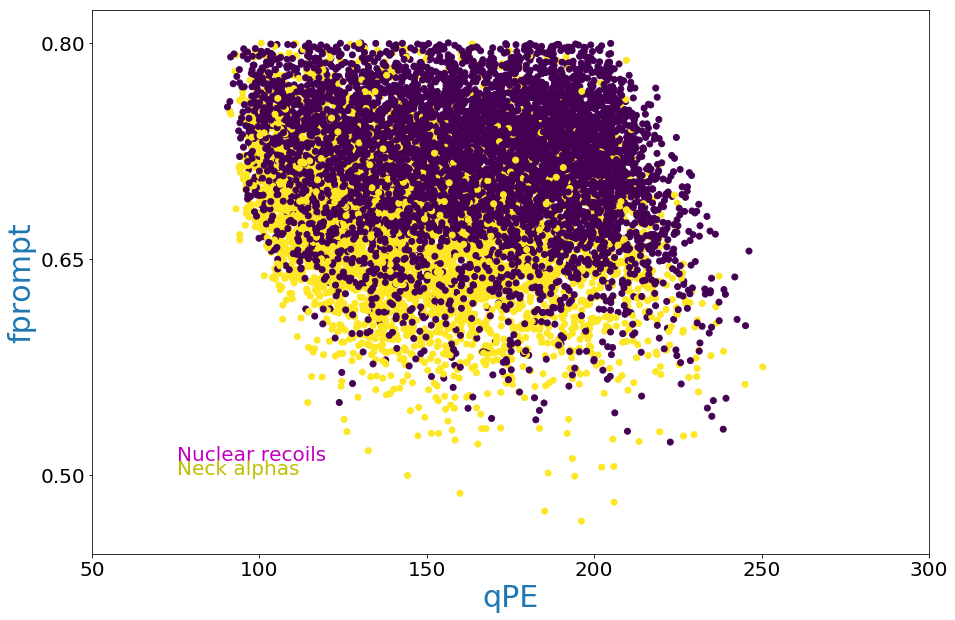

In [107]:
fig5 = plt.figure(1, figsize=[15,10])
plt.scatter(data["qPE"],data["fprompt"], c =tuple(predictions.astype(np.float)))
plt.xlabel('qPE',{'color': 'C0', 'fontsize': 30})
plt.ylabel('fprompt',{'color': 'C0', 'fontsize': 30})
plt.yticks((0.5, 0.65, 0.8), color='k', size=20)
plt.xticks((50, 100, 150, 200, 250, 300), color='k', size=20)
plt.xlim(50,300)
plt.text(75.5, 0.51,'Nuclear recoils', {'color': 'm', 'fontsize': 20})
plt.text(75.5, 0.5, 'Neck alphas', {'color': 'y', 'fontsize': 20})
plt.show()

In [ ]:
sns.pairplot(data[['qPE','fprompt','nSC','rprompt60Bayes','fmaxnsc','mblikelihoodX','mblikelihoodY','mblikelihoodZ','shr','chargethirdbottomring','chargebottomring','chargetopring','chargesecondring','user_feature1','user_feature2','label']], hue = 'label')

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(data_Y, predictions, pos_label=1)
print("ROC AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2))

### Feauture importance

In [ ]:
data=shuffle(data)
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(data.iloc[:,0:66], data["label"], test_size = 0.5, random_state = 1)

In [ ]:
clf1 = xgb.XGBClassifier(booster='gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 40, min_child_weight= 3)

In [ ]:
clf1.fit(X_train,Y_train)

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred))
print("Accuracy score: " + str(metrics.accuracy_score(Y_test, y_pred)))

In [ ]:
predicted_probabilities = clf1.predict_proba(X_test[:])

In [ ]:
feature_importance = clf1.feature_importances_
print(feature_importance)

In [ ]:
from xgboost import plot_importance
fig6 = plt.figure(1, figsize=[30,30])
plot_importance(clf1, grid = True, max_num_features = 20)
plt.show()

In [ ]:
plt.bar(range(len(clf1.feature_importances_)), feature_importance)
plt.show()

In [ ]:
fig1 = plt.figure(figsize=(15,15))
plt.plot(feature_importance, [x for x in X_test.keys()],'gs',ms = 4.)
plt.show()
fig1.savefig("feature_importance.pdf", bbox_inches='tight')

### ROC CURVE

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y_test, predicted_probabilities[:, 1])
backrej=np.abs(fpr-1)

In [ ]:
plt.plot(tpr, backrej,label = 'XGBoost', lw=2)
plt.plot([0.85, 0.85], [0.95, 0.963], color='burlywood', lw=2, linestyle='--')
plt.plot([0.25, 0.85], [0.963, 0.963], color='burlywood', lw=2, linestyle='--')
plt.plot([0.684, 0.684], [0.99, 0.95], color='burlywood', lw=2, linestyle='--')
plt.plot([0.25, 0.684], [0.99, 0.99], color='burlywood', lw=2, linestyle='--')
plt.plot([0.25, 0.38], [0.999, 0.999], color='burlywood', lw=2, linestyle='--')
plt.plot([0.38, 0.38], [0.95, 0.999], color='burlywood', lw=2, linestyle='--')
plt.xlim([0.25, 0.95])
plt.ylim([0.95, 1.001])
plt.ylabel('Background Rejection Rate',{'fontsize': 14})
plt.xlabel('Signal Acceptance (True Positive rate)',{'fontsize': 14})
plt.yticks((0.95, 0.96, 0.97, 0.98, 0.99, 1.00), color='k', size=14)
plt.xticks((0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), color='k', size=14)
plt.title('ROC curve',{'fontsize': 14})

### Statistical importance

In [ ]:
idx_NR = np.where(Y_test == 1)[0]
idx_alphas = np.where(Y_test == 0)[0]

In [ ]:
# Histogram predictions without error bars:
bins = 100
fig2 = plt.figure(figsize=(40,30))
fig2, ax = plt.subplots(1)
n1, bins1, patches1 = ax.hist(predicted_probabilities[idx_NR, 1], histtype='step', label='NR', bins = bins)
n2, bins2, patches2 = ax.hist(predicted_probabilities[idx_alphas, 1], histtype='step', label='alphas', bins = bins)
ax.set_xlabel('Prediction', {'fontsize': 14})
ax.set_ylabel('Number of events', {'fontsize': 14})
plt.legend()

In [ ]:
# Histogram predictions without error bars:
bins = 100
fig2 = plt.figure(figsize=(40,30))
fig2, ax = plt.subplots(1)
n1, bins1, patches1 = ax.hist(predicted_probabilities[idx_NR, 1], histtype='step', label='NR', bins = bins)
n2, bins2, patches2 = ax.hist(predicted_probabilities[idx_alphas, 1], histtype='step', label='alphas', bins = bins)
ax.set_xlabel('Prediction', {'fontsize': 14})
ax.set_ylabel('Number of events', {'fontsize': 14})
plt.yticks((10**0, 10**1, 10**2, 10**3), color='k', size=14)
plt.xticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0), color='k', size=14)
plt.yscale('log')
plt.legend(loc="upper center")

In [ ]:
#from sklearn.feature_selection import RFECV
#rfecv = RFECV(estimator=clf, step=1, cv=cv,
#              scoring='accuracy')
#rfecv.fit(data_X, data_Y)

In [ ]:
#print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

In [ ]:
print(predictions)
print(data_Y)

In [ ]:
print(predictions - data_Y)

In [ ]:
conf=predictions - data_Y
conf_df=pd.DataFrame(conf)
cnt=0
for i in conf:
    if i !=0:
        cnt+=1
        print(i)
print(cnt)

In [ ]:
conf_df["number"]=[n for n in range(len(conf))]
conf_df

In [ ]:
cnt1=0
list_act_nr=[]
list_act_al=[]
for i in range(len(conf)):
    if conf_df.iloc[i,0]<0:
        cnt1+=1
        list_act_al.append(conf_df.iloc[i, 1])
        #print("actual nr: " + str(conf_df.iloc[i, 1]))
    if conf_df.iloc[i,0]>0:
        cnt1+=1
        list_act_nr.append(conf_df.iloc[i, 1])
        #print("actual neck alpha: " + str(conf_df.iloc[i, 1]))
print(cnt1)

In [ ]:
dataX=data_X

In [ ]:
dataX["number"]=[n for n in range(len(conf))]

In [ ]:
dataX

In [ ]:
datap=np.array([0 for x in range(67)])
for i in dataX["number"]:
    if i in list_act_nr:
        npd=np.array(dataX.iloc[i,:])
        datap=np.vstack((datap,npd))

In [ ]:
datapd=pd.DataFrame(datap)
datapd["label"]=[1 for i in range(len(datapd.index))]


In [ ]:
datap1=np.array([0 for x in range(67)])
for i in dataX["number"]:
    if i in list_act_al:
        npd=np.array(dataX.iloc[i,:])
        datap1=np.vstack((datap1,npd))

In [ ]:
datapd1=pd.DataFrame(datap1)
datapd1["label"]=[0 for i in range(len(datapd1.index))]

In [ ]:
frames1=[datapd,datapd1]
fdatapd=pd.concat(frames1)
fdatapd.head()

In [ ]:
fig6 = plt.figure(1, figsize=[20,15])
plt.scatter(fdatapd.iloc[:,3],fdatapd.iloc[:,8])
plt.xlabel('qPE')
plt.ylabel('fprompt')
plt.xlim(85,250)
plt.show()

In [ ]:
sns.pairplot(fdatapd[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,"label"]], hue = "label")

In [ ]:
sns.pairplot(fdatapd[[0,1,2,3,4,5,"label"]], hue = "label")

In [ ]:
sns.pairplot(fdatapd[[6,7,8,9,10,11,12,"label"]], hue = "label")

In [ ]:
sns.pairplot(fdatapd[[12,13,14,15,16,17,18,19,20,"label"]], hue = "label")

In [ ]:
sns.pairplot(fdatapd[[1,2,3,4,"label"]], hue = "label")

In [ ]:
sns.pairplot(data[['qPE','fprompt','nSC','rprompt60Bayes','fmaxnsc','user_feature1','user_feature2','label']], hue = 'label')

In [ ]:
my_cmap = plt.cm.copper
my_cmap.set_under('w',1)
plt.hist2d(fdatapd["qPE"],fdatapd["fmaxnsc"],(200,200),((0,250.),(0., 0.2)),cmap = my_cmap)
plt.show()

In [ ]:
my_cmap = plt.cm.copper
my_cmap.set_under('w',1)
plt.hist2d(fdatapd.iloc[:,0],fdatapd.iloc[:,4],(200,200),((0,250.),(0., 0.2)),cmap = my_cmap)
plt.show()